#  **Kelompok 8B - Ruang Warna pada Citra**

>[!NOTE] untuk menjalankan semua sekaligus, gunakan menu Runtime -> Run all


1.   import library yang digunakan

In [ ]:
import cv2  # OpenCV untuk pemrosesan citra
import numpy as np  # NumPy untuk operasi array
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi
import requests  # Untuk mengunduh gambar dari URL
from google.colab.patches import cv2_imshow  # Untuk menampilkan gambar di Colab

2.   mendefinisikan fungsi unduh gambar untuk kedua gambar apel hijau dan merah, disini fungsi mengunduh gambar dari URL dan menyimpannya dengan nama tertentu

In [ ]:
def download_image(url: str, filename: str) -> str:
    response = requests.get(url)
    with open(filename, "wb") as file:
        file.write(response.content)
    print(f"Downloaded {filename}")
    return filename

3.   mendefinisikan fungsi mengecek kematangan, disini fungsi menentukan tingkat kematangan tomat berdasarkan warna dominan dalam citra Menggunakan ruang warna HSV untuk mendeteksi warna merah dan hijau.


In [ ]:
def is_ripe(image_path: str) -> bool:
    print(f'Loading image: {image_path}')

    # Membaca gambar dalam format BGR (default OpenCV)
    image = cv2.imread(image_path)
    print(f'Original Image Shape: {image.shape}')


    # Menampilkan gambar asli
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print('Converted to RGB')
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

    # Mengonversi citra dari RGB ke HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Mendefinisikan jangkauan warna dalam HSV untuk deteksi warna merah dan hijau
    lower_red = np.array([0, 120, 70])  # Rentang bawah warna merah dalam HSV
    upper_red = np.array([10, 255, 255])  # Rentang atas warna merah
    lower_green = np.array([35, 100, 100])  # Rentang bawah warna hijau
    upper_green = np.array([85, 255, 255])  # Rentang atas warna hijau

    # Membuat mask untuk mendeteksi piksel dalam rentang warna merah dan hijau
    red_mask = cv2.inRange(hsv, lower_red, upper_red)
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Menampilkan hasil masking
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(red_mask, cmap='gray')
    plt.title("Red Mask")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(green_mask, cmap='gray')
    plt.title("Green Mask")
    plt.axis("off")
    plt.show()

    # Menghitung jumlah piksel yang masuk dalam rentang merah dan hijau
    red_pixels = np.sum(red_mask > 0)
    green_pixels = np.sum(green_mask > 0)
    print(f'Red Pixels: {red_pixels}, Green Pixels: {green_pixels}')
    print()

    # Menentukan kematangan berdasarkan warna dominan
    return red_pixels > green_pixels

4.   lakukan percobaan

Downloaded green_tomato.jpg
Downloaded red_tomato.jpg
Loading image: green_tomato.jpg
Original Image Shape: (283, 279, 3)
Converted to RGB


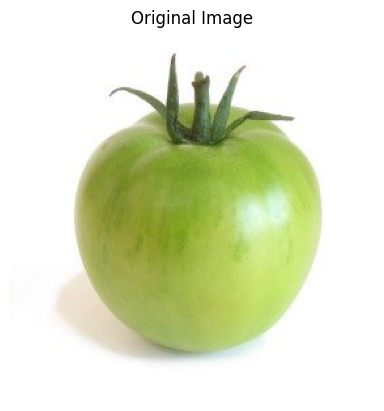

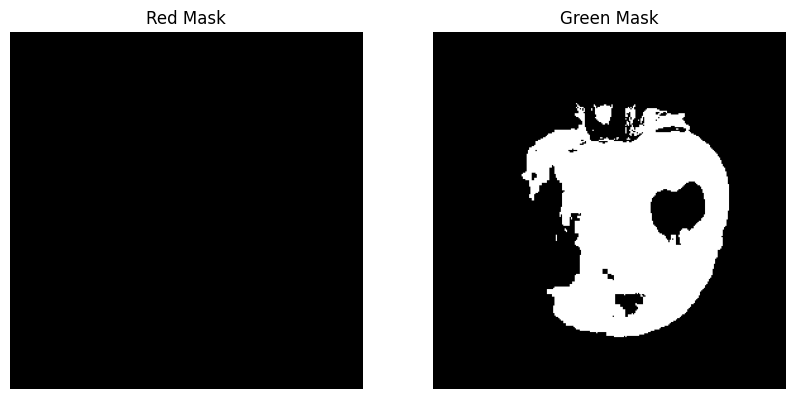

Red Pixels: 0, Green Pixels: 18251

Loading image: red_tomato.jpg
Original Image Shape: (399, 600, 3)
Converted to RGB


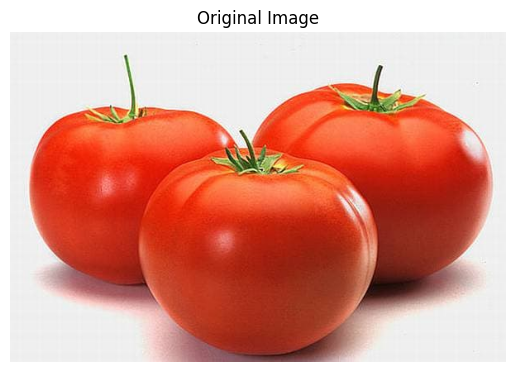

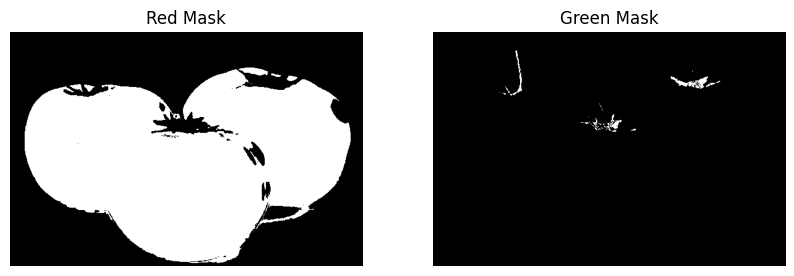

Red Pixels: 120884, Green Pixels: 1186

Hasil deteksi menunjukkan:
Green Tomato: Not Ripe (Green)
Red Tomato: Ripe (Red)


In [ ]:
# Mengunduh gambar dari URL
green_tomato_path = download_image("https://i0.wp.com/resepkoki.id/wp-content/uploads/2018/11/tomat-hijau.jpg", "green_tomato.jpg")
red_tomato_path = download_image("https://i0.wp.com/resepkoki.id/wp-content/uploads/2018/11/tomat-apel.jpg", "red_tomato.jpg")

# Menguji fungsi terhadap gambar yang diunduh
green_tomato_result = is_ripe(green_tomato_path)
red_tomato_result = is_ripe(red_tomato_path)
pprint = lambda x: "Ripe (Red)" if x else "Not Ripe (Green)"

# Menampilkan hasil deteksi

print("Hasil deteksi menunjukkan:")
print(f'Green Tomato: {pprint(green_tomato_result)}')
print(f'Red Tomato: {pprint(red_tomato_result)}')